In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno#缺失值库
# import kaleido

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

from wordcloud import WordCloud

In [2]:
dict_path="E:/数据挖掘/数维杯/2022“ShuWei Cup”_Problem/2022“ShuWei Cup”_Problem/2022_“ShuWei Cup”C_Problem"
data_path=dict_path+"/data"
img_path=dict_path+"/img"

In [3]:
data=pd.read_csv(data_path+"/ADNIMERGE_New.csv",low_memory=False)
data.head(10)

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,58:48.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,58:48.0
5,4,ADNI1,ADNI1,022_S_0004,22,bl,2005-11-8,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.000000,0.00000,0,0,01:40.0
6,4,ADNI1,ADNI1,022_S_0004,22,m06,2006-5-2,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.479124,5.73770,6,6,01:40.0
7,4,ADNI1,ADNI1,022_S_0004,22,m12,2006-11-14,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,1.015740,12.16390,12,12,01:40.0
8,4,ADNI1,ADNI1,022_S_0004,22,m18,2007-5-14,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,1.511290,18.09840,18,18,01:40.0
9,4,ADNI1,ADNI1,022_S_0004,22,m36,2008-11-18,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,3.028060,36.26230,36,36,01:40.0


In [4]:
print("Shape of data:",data.shape)

Shape of data: (16222, 116)


In [5]:
data_columns=data.columns
data_columns

Index(['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER',
       ...
       'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'FBB_bl', 'Years_bl',
       'Month_bl', 'Month', 'M', 'update_stamp'],
      dtype='object', length=116)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16222 entries, 0 to 16221
Columns: 116 entries, RID to update_stamp
dtypes: float64(88), int64(5), object(23)
memory usage: 14.4+ MB


In [7]:
data.describe()

,RID,SITE,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,FBB,CDRSB,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M
count,16222.000000,16222.000000,16213.000000,16222.000000,15907.000000,3693.000000,223.000000,3080.000000,514.000000,11634.000000,...,8729.000000,8898.000000,11127.000000,154.000000,7729.000000,1048.000000,16222.000000,16222.000000,16222.000000,16222.000000
mean,2866.047343,81.490692,73.250786,16.104981,0.517131,1.175624,1.783161,1.193030,1.174792,2.044482,...,1.738420,1.604383,1.226403,1.582256,1.187312,1.163628,2.695076,32.274644,32.193688,32.059980
std,2205.254476,132.050554,7.011759,2.766438,0.647568,0.167288,0.422511,0.230866,0.246077,2.860615,...,0.862778,0.671764,0.153262,0.302114,0.220179,0.237175,2.888387,34.589618,34.578929,34.502228
min,2.000000,2.000000,50.400000,4.000000,0.000000,0.566989,1.095000,0.809000,0.870200,0.000000,...,1.000000,1.000000,0.621933,1.155000,0.810000,0.870200,0.000000,0.000000,0.000000,0.000000
25%,741.000000,22.000000,68.500000,14.000000,0.000000,1.071700,1.361250,1.010075,0.996225,0.000000,...,1.000000,1.102560,1.134320,1.360000,1.012800,0.995100,0.503765,6.032790,6.000000,6.000000
50%,2263.000000,41.000000,73.300000,16.000000,0.000000,1.180590,1.850000,1.106800,1.053850,1.000000,...,1.500000,1.333330,1.234490,1.490000,1.099900,1.042000,1.905545,22.819700,24.000000,24.000000
75%,4668.000000,123.000000,78.100000,18.000000,1.000000,1.287080,2.127500,1.358425,1.350275,3.000000,...,2.000000,1.918920,1.331450,1.835000,1.347300,1.318600,4.002740,47.934400,48.000000,48.000000
max,7105.000000,941.000000,91.400000,20.000000,2.000000,1.776170,2.927500,2.686600,2.008800,18.000000,...,4.000000,3.948720,1.776170,2.282500,2.010100,1.909000,16.539400,198.066000,198.000000,198.000000


# EDA

In [12]:
#COLPROT: 数据采集方案
COLPROT_distribution = data['COLPROT'].value_counts()
fig = px.bar(y=COLPROT_distribution.values, 
             x=COLPROT_distribution.index, 
             color = COLPROT_distribution.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=COLPROT_distribution.values,
             title= 'COLPROT_distribution',
             template= 'plotly')
fig.update_layout(
    xaxis_title="COLPROT",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()


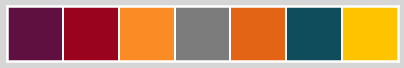

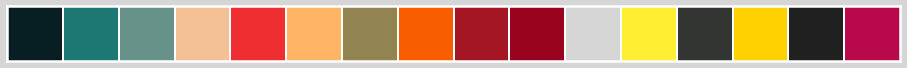

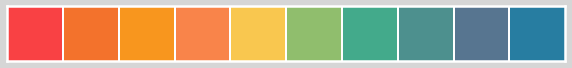

In [24]:
#查看sns的调色板

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#d6d6d6","figure.facecolor":"#d6d6d6"})#改背景
sns.set_context("poster",font_scale = .7)
palette = ["#5f0f40","#9a031e","#fb8b24","#7C7C7C","#e36414","#0f4c5c","#FFC300"]
palette_ex = ["#071e22","#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#333533","#ffd100","#202020","#B7094C"]
pal = ["#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"]

sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette_ex))
sns.palplot(sns.color_palette(pal))
plt.show()

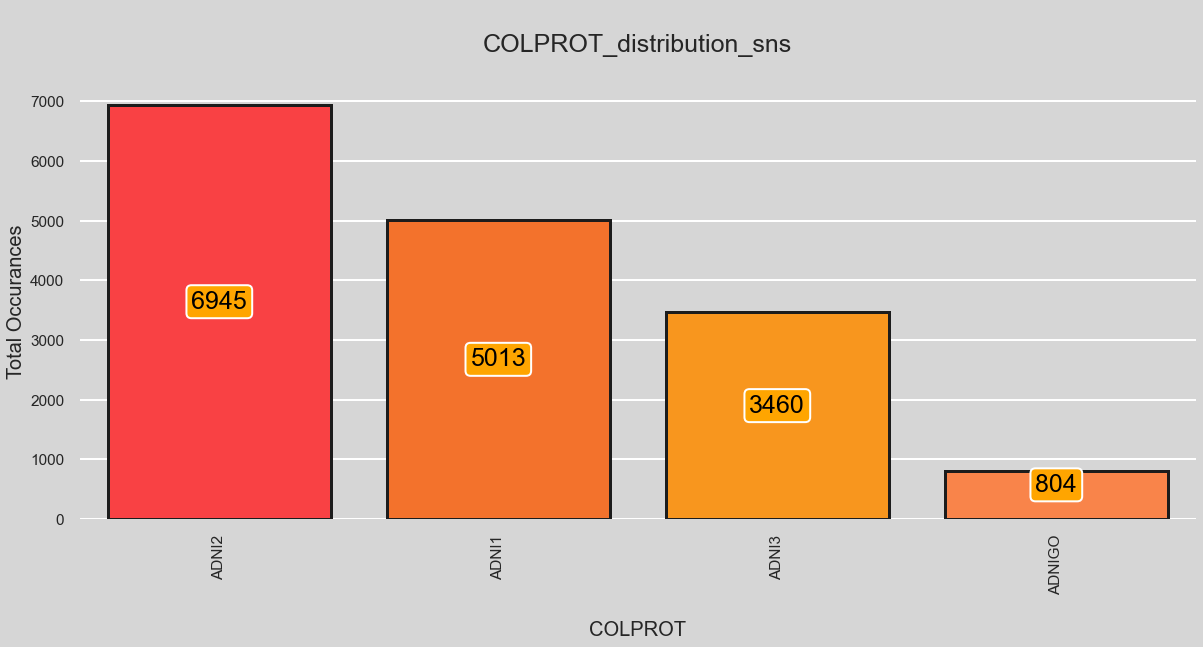

In [25]:
plt.subplots(figsize=(20, 8))
p=sns.countplot(x =  data['COLPROT'], order = COLPROT_distribution.index,palette=pal, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nCOLPROT_distribution_sns\n",fontsize=25)
plt.ylabel("Total Occurances",fontsize=20)
plt.xlabel("\nCOLPROT",fontsize=20)
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})

    
sns.despine(left=True, bottom=True)
plt.savefig(img_path+'/nCOLPROT_distribution_sns.png',dpi=500)
plt.show()

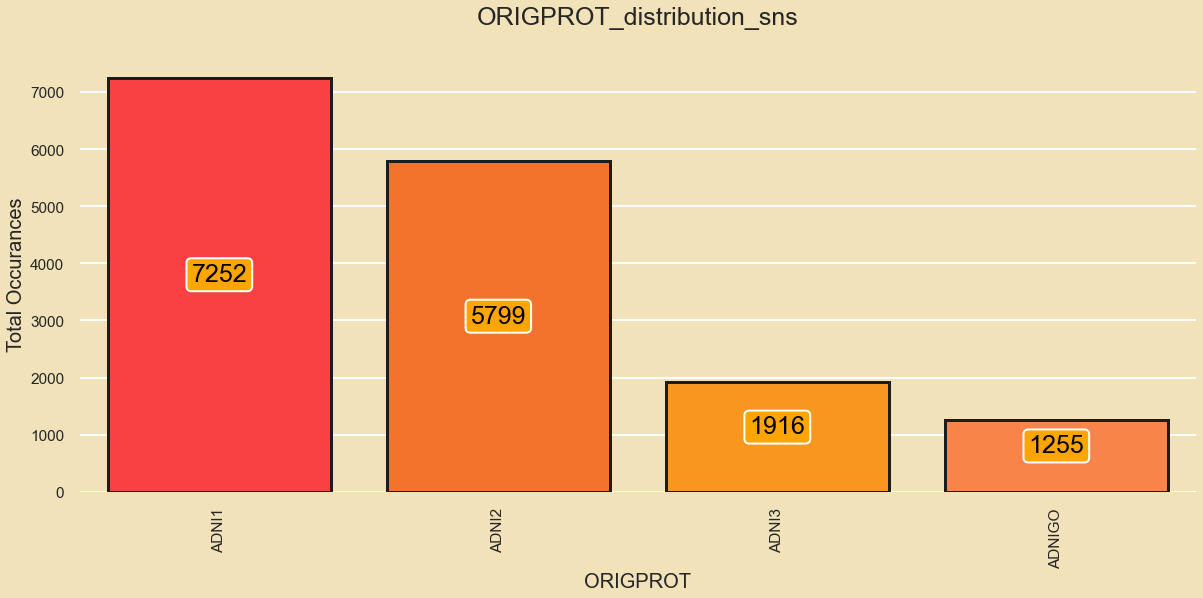

In [23]:
plt.subplots(figsize=(20, 8))
ORIGPROT_distribution = data['ORIGPROT'].value_counts()
p=sns.countplot(x =  data['ORIGPROT'], order = ORIGPROT_distribution.index,palette=pal, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("ORIGPROT_distribution_sns\n",fontsize=25)
plt.ylabel("Total Occurances",fontsize=20)
plt.xlabel("ORIGPROT",fontsize=20)
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})

    
sns.despine(left=True, bottom=True)
plt.savefig(img_path+'/ORIGPROT_distribution_sns.png',dpi=500)
plt.show()


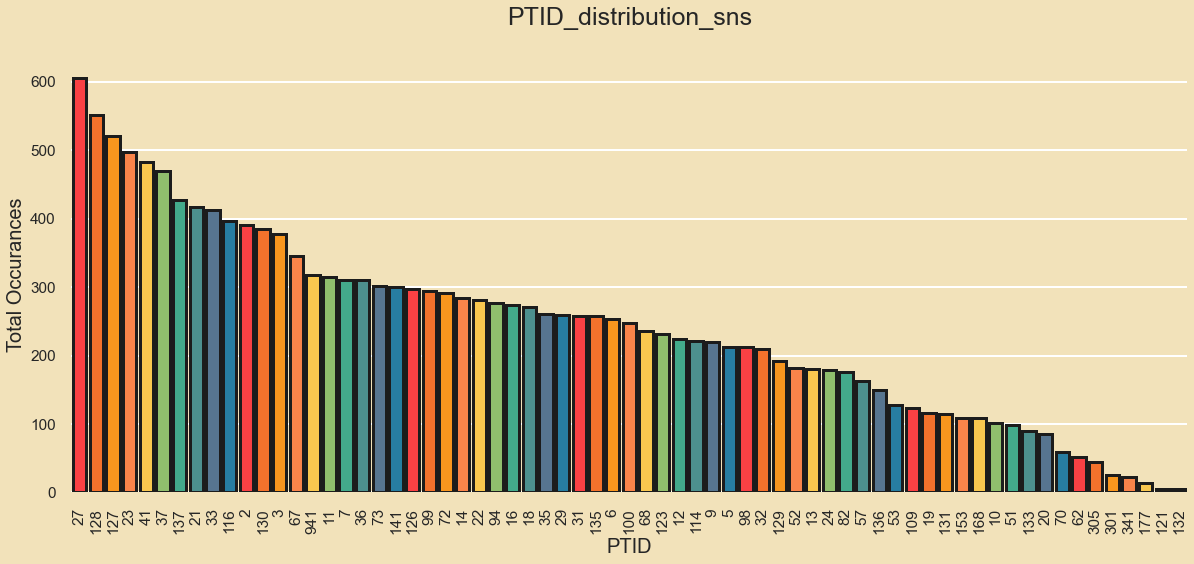

In [24]:
plt.subplots(figsize=(20, 8))
PTID_distribution = data['SITE'].value_counts()
p=sns.countplot(x =  data['SITE'], order = PTID_distribution.index,palette=pal, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("PTID_distribution_sns\n",fontsize=25)
plt.ylabel("Total Occurances",fontsize=20)
plt.xlabel("PTID",fontsize=20)
plt.xticks(rotation=90)
# for container in p.containers:
#     p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
#     bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})

    
sns.despine(left=True, bottom=True)
plt.savefig(img_path+'/PTID_distribution_sns.png',dpi=500)
plt.show()


In [26]:
#COLPROT: 数据采集方案
COLPROT_distribution = data['DX_bl'].value_counts()
fig = px.bar(y=COLPROT_distribution.values, 
             x=COLPROT_distribution.index, 
             color = COLPROT_distribution.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=COLPROT_distribution.values,
             title= 'DX_bl_distribution',
             template= 'plotly')
fig.update_layout(
    xaxis_title="DX_bl",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()


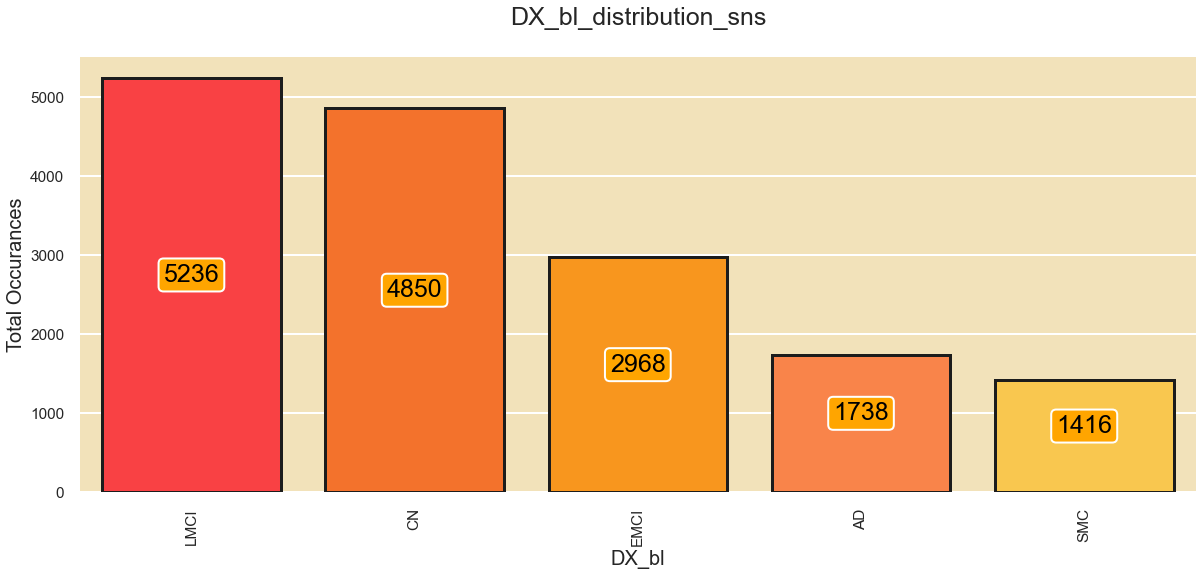

In [14]:
#data["DX_bl"]
plt.subplots(figsize=(20, 8))
DX_bl_distribution = data['DX_bl'].value_counts()
p=sns.countplot(x =  data['DX_bl'], order = DX_bl_distribution.index,palette=pal, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("DX_bl_distribution_sns\n",fontsize=25)
plt.ylabel("Total Occurances",fontsize=20)
plt.xlabel("DX_bl",fontsize=20)
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})

    
sns.despine(left=True, bottom=True)
plt.savefig(img_path+'/DX_bl_distribution.png',dpi=500)
plt.show()


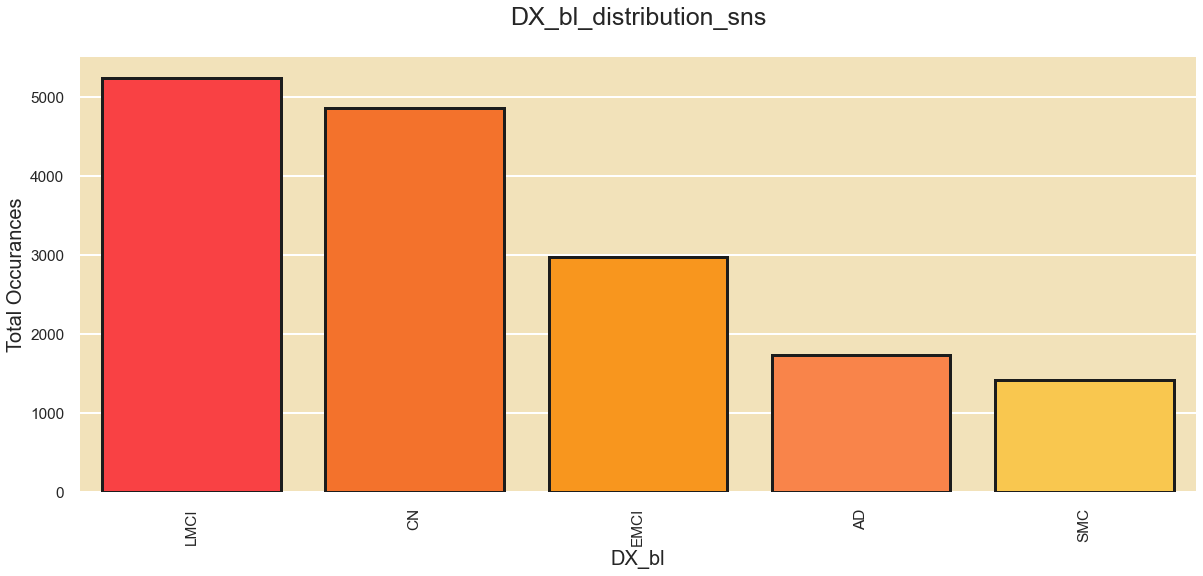

In [15]:
#data["DX_bl"]
plt.subplots(figsize=(20, 8))
DX_bl_distribution = data['DX_bl'].value_counts()
p=sns.countplot(x =  data['DX_bl'], order = DX_bl_distribution.index,palette=pal, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("DX_bl_distribution_sns\n",fontsize=25)
plt.ylabel("Total Occurances",fontsize=20)
plt.xlabel("DX_bl",fontsize=20)
plt.xticks(rotation=90)
# for container in p.containers:
#     p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
#     bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})

    
sns.despine(left=True, bottom=True)
plt.savefig(img_path+'/DX_bl_distribution.png',dpi=500)
plt.show()


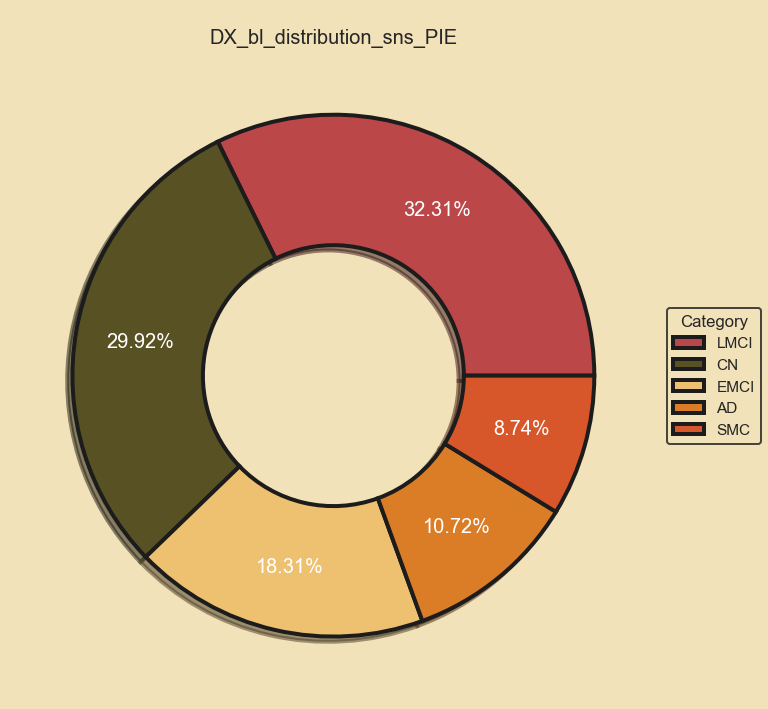

In [26]:
plt.subplots(figsize=(12, 12))

labels = "LMCI","CN","EMCI","AD","SMC"
size = 0.5

wedges, texts, autotexts = plt.pie(data['DX_bl'].value_counts().values,
                                    explode = (0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.75,
                                    radius=1, 
                                    colors = ["#bc4749","#585123","#eec170","#db7c26","#d8572a"],
                                    # labels = labels, # labeldistance = 1.05,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),edgecolor = "#1c1c1c")
plt.title("\nDX_bl_distribution_sns_PIE",fontsize=20)
plt.savefig(img_path+"/nDX_bl_distribution_sns_PIE.png",dpi=500)
plt.show()

In [27]:
LMCI=data[data['DX_bl']=="LMCI"]
CN=data[data['DX_bl']=="CN"]
EMCI=data[data['DX_bl']=="EMCI"]
AD=data[data['DX_bl']=="AD"]
SMC=data[data['DX_bl']=="SMC"]


In [28]:
print("LMCI:",LMCI["CDRSB_bl"].value_counts())
print("CN:",CN["CDRSB_bl"].value_counts())
print("EMCI:",EMCI["CDRSB_bl"].value_counts())
print("AD:",AD["CDRSB_bl"].value_counts())
print("SMC:",SMC["CDRSB_bl"].value_counts())

LMCI: 1.0    1320
1.5    1124
0.5     896
2.0     787
2.5     532
3.0     283
3.5     164
4.0      92
4.5      17
5.0      12
5.5       7
0.0       2
Name: CDRSB_bl, dtype: int64
CN: 0.0    4609
0.5     235
1.0       6
Name: CDRSB_bl, dtype: int64
EMCI: 0.5    956
1.0    768
1.5    600
2.0    359
2.5    173
3.5     46
4.0     25
3.0     22
0.0     13
6.0      4
5.5      2
Name: CDRSB_bl, dtype: int64
AD: 4.5     296
5.0     238
3.5     207
4.0     195
3.0     149
2.5     126
6.0     125
7.0      76
5.5      75
1.5      64
8.0      62
2.0      61
6.5      24
9.0      16
1.0      15
10.0      9
Name: CDRSB_bl, dtype: int64
SMC: 0.0    1278
0.5     136
1.0       2
Name: CDRSB_bl, dtype: int64


In [29]:
print("SMC:",SMC["mPACCtrailsB_bl"].value_counts())

SMC:  1.881310    14
 2.532620    13
-0.734046    12
 1.027080    11
 1.481200    11
             ..
-0.312740     1
 0.033434     1
-2.423670     1
-0.329132     1
 1.624120     1
Name: mPACCtrailsB_bl, Length: 345, dtype: int64


<AxesSubplot: ylabel='Count'>

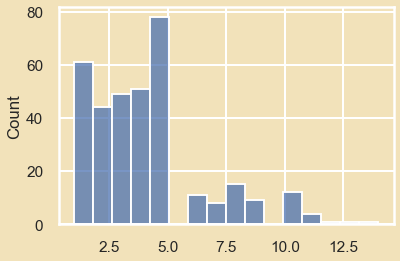

In [30]:
sns.histplot(SMC["mPACCtrailsB_bl"].value_counts().values)

In [31]:
# _, axs = plt.subplots(2,3,figsize=(20,10),sharex=True)
# plt.tight_layout(pad=4.0)

# sns.countplot(x="day",y="aircraft",ax=axs[0,0],color=palette[5])
# axs[0,0].set_title("Aircraft\n",fontsize=25)
# axs[0,0].set_xlabel("Days",fontsize=20)
# axs[0,0].set_ylabel("Quantity",fontsize=20)

# sns.lineplot(x="day",y="helicopter",ax=axs[0,1],color=palette[6])
# axs[0,1].set_title("Helicopter\n",fontsize=25)
# axs[0,1].set_xlabel("Days",fontsize=20)
# axs[0,1].set_ylabel("Quantity",fontsize=20)

# sns.lineplot(x="day",y="drone",ax=axs[1,0],color=palette[0])
# axs[1,0].set_title("Drone\n",fontsize=25)
# axs[1,0].set_xlabel("\nDays",fontsize=20)
# axs[1,0].set_ylabel("Quantity",fontsize=20)

# sns.lineplot(x="day",y="mobile SRBM system"],ax=axs[1,1],color=palette[1])
# axs[1,1].set_title("Mobile SRBM System\n",fontsize=25)
# axs[1,1].set_xlabel("\nDays",fontsize=20)
# axs[1,1].set_ylabel("Quantity",fontsize=20)

# plt.suptitle("Daywise Air Equipments Destruction",fontsize=30, y=1.05)

# sns.despine(left=True, bottom=True)
# plt.show()

In [32]:

fig, ax = plt.subplots(5, 1, figsize=(15, 30))

sns.countplot(x='CDRSB_bl',hue='DX_bl',data=data,ax=ax[0])
#第一张图发现CN在0.0中最多  而AD在3.5-6  LMCI在0.5-2.5 SMC在0较多 EMCI于LMCI分布相似
sns.countplot(x='LDELTOTAL_BL',hue='DX_bl',data=data,ax=ax[1])
#
sns.countplot(x='IMAGEUID_bl',hue='DX_bl',data=data,ax=ax[2])
sns.countplot(x='mPACCdigit_bl',hue='DX_bl',data=data,ax=ax[3])
sns.countplot(x='mPACCtrailsB_bl',hue='DX_bl',data=data,ax=ax[4])



KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B6B13434C0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.savefig(img_path+"/Word_Cloud.png")
    plt.show()

In [ ]:
features_importances={'missing_rate_col': 0.03586528249085982,
 'mPACCtrailsB_bl': 0.03586528249085982,
 'mPACCtrailsB': 0.03586528249085982,
 'mPACCdigit_bl': 0.03586528249085982,
 'mPACCdigit': 0.03586528249085982,
 'Years_bl': 0.03586528249085982,
 'WholeBrain_bl': 0.03586528249085982,
 'WholeBrain': 0.03586528249085982,
 'Ventricles_bl': 0.03586528249085982,
 'Ventricles': 0.03586528249085982,
 'TRABSCOR_bl': 0.03586528249085982,
 'TRABSCOR': 0.03586528249085982,
 'SITE': 0.03586528249085982,
 'RAVLT_perc_forgetting_bl': 0.03586528249085982,
 'RAVLT_perc_forgetting': 0.03586528249085982,
 'RAVLT_learning_bl': 0.03586528249085982,
 'RAVLT_learning': 0.03586528249085982,
 'RAVLT_immediate_bl': 0.03586528249085982,
 'RAVLT_immediate': 0.03586528249085982,
 'RAVLT_forgetting_bl': 0.03586528249085982,
 'RAVLT_forgetting': 0.03586528249085982,
 'PTEDUCAT': 0.03586528249085982,
 'Month_bl': 0.03586528249085982,
 'Month': 0.03586528249085982,
 'MidTemp_bl': 0.03586528249085982,
 'MidTemp': 0.03586528249085982,
 'MOCA_bl': 0.03586528249085982,
 'MMSE_bl': 0.03586528249085982,
 'MMSE': 0.03586528249085982,
 'M': 0.03586528249085982,
 'LDELTOTAL_BL': 0.03586528249085982,
 'LDELTOTAL': 0.03586528249085982,
 'IMAGEUID_bl': 0.03586528249085982,
 'IMAGEUID': 0.03586528249085982,
 'ICV_bl': 0.03586528249085982,
 'ICV': 0.03586528249085982,
 'Hippocampus_bl': 0.03586528249085982,
 'Hippocampus': 0.03586528249085982,
 'Fusiform_bl': 0.03586528249085982,
 'Fusiform': 0.03586528249085982,
 'FDG_bl': 0.03586528249085982,
 'FAQ_bl': 0.03586528249085982,
 'FAQ': 0.03586528249085982,
 'Entorhinal_bl': 0.03586528249085982,
 'Entorhinal': 0.03586528249085982,
 'EcogSPVisspat_bl': 0.03586528249085982,
 'EcogSPTotal_bl': 0.03586528249085982,
 'EcogSPPlan_bl': 0.03586528249085982,
 'EcogSPOrgan_bl': 0.03586528249085982,
 'EcogSPMem_bl': 0.03586528249085982,
 'EcogSPLang_bl': 0.03586528249085982,
 'EcogSPDivatt_bl': 0.03586528249085982,
 'EcogPtVisspat_bl': 0.03586528249085982,
 'EcogPtTotal_bl': 0.03586528249085982,
 'EcogPtPlan_bl': 0.03586528249085982,
 'EcogPtOrgan_bl': 0.03586528249085982,
 'EcogPtMem_bl': 0.03586528249085982,
 'EcogPtLang_bl': 0.03586528249085982,
 'EcogPtDivatt_bl': 0.03586528249085982,
 'CDRSB_bl': 0.03586528249085982,
 'CDRSB': 0.03586528249085982,
 'APOE4': 0.03586528249085982,
 'AGE': 0.03586528249085982,
 'ADASQ4_bl': 0.03586528249085982,
 'ADASQ4': 0.03586528249085982,
 'ADAS13_bl': 0.03586528249085982,
 'ADAS13': 0.03586528249085982,
 'ADAS11_bl': 0.03586528249085982,
 'ADAS11': 0.03586528249085982}

Word_Cloud(features_importances ,'black','RdBu', 'WordCloud of features importance')

In [36]:
data1=data.fillna(0)

<Figure size 6000x1800 with 0 Axes>

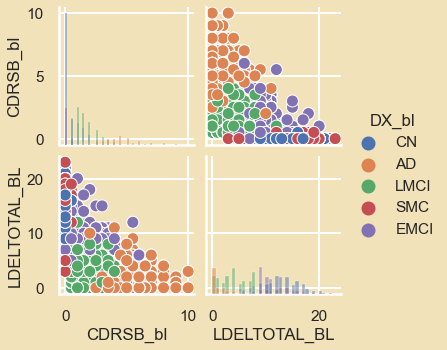

In [42]:
# numerical_features = [x for x in data.columns if data[x].dtype == np.float]

# category_features = [x for x in data.columns if data[x].dtype != np.float and x != 'RainTomorrow']

## 选取三个特征与标签组合的散点可视化
plt.figure(figsize=(20,6),dpi=300)
sns.pairplot(data=data[['CDRSB_bl',
'LDELTOTAL_BL']+['DX_bl']], diag_kind='hist', hue= 'DX_bl')
plt.show()